# ODE - turbine wind speed predictor

https://charlies-organization-9.gitbook.io/charlies-organization/v/wedowind-open-data-exploration/challenges/images-and-media

https://app.gitbook.com/o/WlpzH68zwmW5fTMYLtJp/s/jwmIkzy4Mi6XjiwhpeaK/charlies-attempt-s

The first step is to use the data from January to create some wind speed prediction models.

We can then use the February data to make the predictions for the challenge for comparison with others.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import linear_model 
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from bokeh.palettes import Viridis, Category10

output_notebook()

Loading BokehJS ...

In [2]:
scada = pd.read_excel("January.xlsx",sheet_name="January", header=[0, 1],index_col=[0])

scada_nogaps = scada.dropna()

windspeed_predictions = None
result_statistics = None

In [3]:
scada.describe()

Wind speed (m/s)                                                      \
Turbine       Kelmarsh 1   Kelmarsh 2   Kelmarsh 3   Kelmarsh 4   Kelmarsh 5   
count        4464.000000  4457.000000  4457.000000  4457.000000  4457.000000   
mean            6.498583     6.859836     6.513348     6.648535     6.299577   
std             2.760786     2.780398     2.691276     2.870674     2.725628   
min             0.229894     0.219038     0.153413     0.229519     0.129863   
25%             4.689426     5.037656     4.647389     4.648966     4.396145   
50%             6.296472     6.622995     6.308268     6.263663     6.056431   
75%             8.266593     8.641073     8.334391     8.659912     7.959469   
max            16.058871    15.840706    15.074520    15.892050    17.093325   

                     Wind direction (Â°)                            \
Turbine   Kelmarsh 6          Kelmarsh 1   Kelmarsh 2   Kelmarsh 3   
count    4448.000000         4464.000000  4457.000000  4457.000000   
mean        5.987363          200.437321   200.414579   200.132014   
std         2.592229          106.314965   106.153482   106.576549   
min         0.144019            0.148893     0.339643     0.179102   
25%         4.290747           98.241596   100.696714    99.089248   
50%         5.775729          241.484495   240.900105   240.362505   
75%         7.439784          273.117777   275.541088   273.991933   
max        14.814208          359.859585   359.921878   359.922175   

                                                 Power (kW)               \
Turbine   Kelmarsh 4   Kelmarsh 5   Kelmarsh 6   Kelmarsh 1   Kelmarsh 2   
count    4457.000000  4457.000000  4448.000000  4464.000000  4457.000000   
mean      198.339182   200.922462   203.442218   685.995072   806.777298   
std       106.465689   105.679475   106.098445   683.180133   705.223954   
min         0.085924     0.109832     0.069624   -13.960006   -14.298286   
25%        94.237455   104.514798   108.177302    92.896483   190.445308   
50%       239.431864   240.218062   244.525451   461.453272   601.114650   
75%       272.200243   273.731038   275.625931  1147.826070  1388.995370   
max       359.956059   359.906699   359.962018  2069.889276  2070.840552   

                                                             
Turbine   Kelmarsh 3   Kelmarsh 4   Kelmarsh 5   Kelmarsh 6  
count    4457.000000  4457.000000  4457.000000  4448.000000  
mean      718.656395   694.606737   662.132028   559.185689  
std       671.024427   710.494897   660.823441   606.541415  
min        -9.026835   -11.480155   -11.205683    -9.876610  
25%       157.080841    90.082902   119.172176    95.194823  
50%       500.429417   418.154855   435.336192   337.781688  
75%      1205.420380  1240.869370  1063.468393   821.791052  
max      2064.592859  2070.487347  2066.062480  2070.669836

In [4]:
scada_nogaps.corr()

Wind speed (m/s)                        \
Turbine                              Kelmarsh 1 Kelmarsh 2 Kelmarsh 3   
                    Turbine                                             
Wind speed (m/s)    Kelmarsh 1         1.000000   0.959130   0.906116   
                    Kelmarsh 2         0.959130   1.000000   0.933523   
                    Kelmarsh 3         0.906116   0.933523   1.000000   
                    Kelmarsh 4         0.929968   0.940496   0.888075   
                    Kelmarsh 5         0.912243   0.923058   0.925520   
                    Kelmarsh 6         0.920124   0.927425   0.893303   
Wind direction (Â°) Kelmarsh 1         0.058551   0.047858  -0.033799   
                    Kelmarsh 2         0.058067   0.045391  -0.034304   
                    Kelmarsh 3         0.071997   0.060805  -0.025571   
                    Kelmarsh 4         0.043136   0.031758  -0.049409   
                    Kelmarsh 5         0.056027   0.041709  -0.037150   
                    Kelmarsh 6         0.030558   0.017845  -0.062506   
Power (kW)          Kelmarsh 1         0.884771   0.856205   0.802811   
                    Kelmarsh 2         0.895703   0.920738   0.874422   
                    Kelmarsh 3         0.861669   0.882407   0.936032   
                    Kelmarsh 4         0.830815   0.832425   0.780823   
                    Kelmarsh 5         0.834430   0.839421   0.837013   
                    Kelmarsh 6         0.796192   0.803458   0.765147   

                                                                 \
Turbine                        Kelmarsh 4 Kelmarsh 5 Kelmarsh 6   
                    Turbine                                       
Wind speed (m/s)    Kelmarsh 1   0.929968   0.912243   0.920124   
                    Kelmarsh 2   0.940496   0.923058   0.927425   
                    Kelmarsh 3   0.888075   0.925520   0.893303   
                    Kelmarsh 4   1.000000   0.910001   0.933467   
                    Kelmarsh 5   0.910001   1.000000   0.942715   
                    Kelmarsh 6   0.933467   0.942715   1.000000   
Wind direction (Â°) Kelmarsh 1   0.021094  -0.060501  -0.030510   
                    Kelmarsh 2   0.029377  -0.063494  -0.032081   
                    Kelmarsh 3   0.045612  -0.052234  -0.019369   
                    Kelmarsh 4   0.019152  -0.079167  -0.047184   
                    Kelmarsh 5  -0.013188  -0.063824  -0.034973   
                    Kelmarsh 6  -0.023856  -0.088999  -0.059415   
Power (kW)          Kelmarsh 1   0.855849   0.830347   0.854347   
                    Kelmarsh 2   0.888512   0.858741   0.872911   
                    Kelmarsh 3   0.855230   0.872823   0.854387   
                    Kelmarsh 4   0.892222   0.820460   0.849379   
                    Kelmarsh 5   0.837740   0.884986   0.864653   
                    Kelmarsh 6   0.818962   0.811010   0.851269   

                               Wind direction (Â°)                        \
Turbine                                 Kelmarsh 1 Kelmarsh 2 Kelmarsh 3   
                    Turbine                                                
Wind speed (m/s)    Kelmarsh 1            0.058551   0.058067   0.071997   
                    Kelmarsh 2            0.047858   0.045391   0.060805   
                    Kelmarsh 3           -0.033799  -0.034304  -0.025571   
                    Kelmarsh 4            0.021094   0.029377   0.045612   
                    Kelmarsh 5           -0.060501  -0.063494  -0.052234   
                    Kelmarsh 6           -0.030510  -0.032081  -0.019369   
Wind direction (Â°) Kelmarsh 1            1.000000   0.945212   0.951313   
                    Kelmarsh 2            0.945212   1.000000   0.959532   
                    Kelmarsh 3            0.951313   0.959532   1.000000   
                    Kelmarsh 4            0.939713   0.942815   0.945534   
                    Kelmarsh 5            0.918214   0.899836   0.890388   
                    Kelma

## Straight average (mean)
Taking a straight average (mean) of the wind speed at the other turbines to predict the wind speed at the target turbine.

In [5]:
method_mean = scada["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]).mean(axis=1)
method_mean.to_csv("method_mean.csv")

windspeed_predictions = method_mean
windspeed_predictions.name = "mean"
windspeed_predictions = pd.DataFrame(windspeed_predictions)

## Straight average (median)
Taking a straight average (median) of the wind speed at the other turbines to predict the wind speed at the target turbine.

In [6]:
method_median = scada["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]).median(axis=1)
method_median.to_csv("method_median.csv")

windspeed_predictions["median"] = method_median

## Max of other turbines
Taking the max wind speed from the other turbines to predict the wind speed at the target turbine.

In [7]:
method_max = scada["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]).max(axis=1)
method_max.to_csv("method_max.csv")

windspeed_predictions["max"] = method_max

## Neighbouring turbine's wind speed
Predicting the wind speed based purely on a neighbouring turbine's wind speed

In [8]:
method_neighbour = scada["Wind speed (m/s)"]["Kelmarsh 2"]

windspeed_predictions["neighbour"] = method_neighbour

## Polynomial fit with neighbouring turbine's wind speed
Predicting the wind speed through fitting a polynomial between the wind speed at the target turbine and a neighbouring wind turbine

In [9]:
mymodel = np.poly1d(np.polyfit(scada_nogaps["Wind speed (m/s)"]["Kelmarsh 2"] , scada_nogaps["Wind speed (m/s)"]["Kelmarsh 1"] , 4))
method_poly = mymodel(scada["Wind speed (m/s)"]["Kelmarsh 2"])
method_poly = pd.Series(method_poly,index=scada.index)
method_poly.to_csv("method_poly.csv")

windspeed_predictions["poly"] = method_poly

## Multiple linear regression using wind speed
Utilising the wind speed from all remaining turbines to run a multilinear fit to predict the wind speed at the target turbine.

In [10]:
X = scada_nogaps["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"])
y = scada_nogaps["Wind speed (m/s)"]["Kelmarsh 1"]

regr = linear_model.LinearRegression()
regr.fit(X, y) 

method_multilinearWS = regr.predict(scada_nogaps["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]))
method_multilinearWS = pd.Series(method_multilinearWS,index=scada_nogaps.index)
method_multilinearWS = method_multilinearWS.reindex(scada.index)
method_multilinearWS.to_csv("method_multilinearWS.csv")

windspeed_predictions["multilinearWS"] = method_multilinearWS

## Multiple linear regression using all variables
Utilising the variables from all remaining turbines to run a multilinear fit to predict the wind speed at the target turbine.

In [11]:
column_names = [' '.join(words) for words in scada_nogaps.drop(columns="Kelmarsh 1",level=1).columns]
X = scada_nogaps.drop(columns="Kelmarsh 1",level=1)
X.columns=column_names

y = scada_nogaps["Wind speed (m/s)"]["Kelmarsh 1"]

regr = linear_model.LinearRegression()
regr.fit(X, y)

method_multilinear = regr.predict(X)
method_multilinear = pd.Series(method_multilinear,index=scada_nogaps.index)
method_multilinear = method_multilinear.reindex(scada.index)
method_multilinear.to_csv("method_multilinear.csv")

windspeed_predictions["multilinear"] = method_multilinear

# Results

In [12]:
windspeed_predictions.to_csv("all_methods_january.csv")

rms = np.sqrt(np.mean((windspeed_predictions.sub(scada["Wind speed (m/s)"]["Kelmarsh 1"],axis=0))**2,axis=0))
mae = np.mean(abs(windspeed_predictions.sub(scada["Wind speed (m/s)"]["Kelmarsh 1"],axis=0)),axis=0)
bias = np.mean(windspeed_predictions.sub(scada["Wind speed (m/s)"]["Kelmarsh 1"],axis=0),axis=0)

print(pd.DataFrame.from_dict({"RMS":rms,"MAE":mae, "bias":bias}))

                    RMS       MAE          bias
mean           0.809614  0.584967 -3.691629e-02
median         0.849890  0.588921  5.393827e-02
max            1.040393  0.781155  7.463764e-01
neighbour      0.871019  0.611562  3.607463e-01
poly           0.778579  0.565328 -3.828170e-04
multilinearWS  0.733688  0.521294  7.028750e-16
multilinear    0.719874  0.507890  2.300318e-16


<Axes: xlabel='Timestamp'>

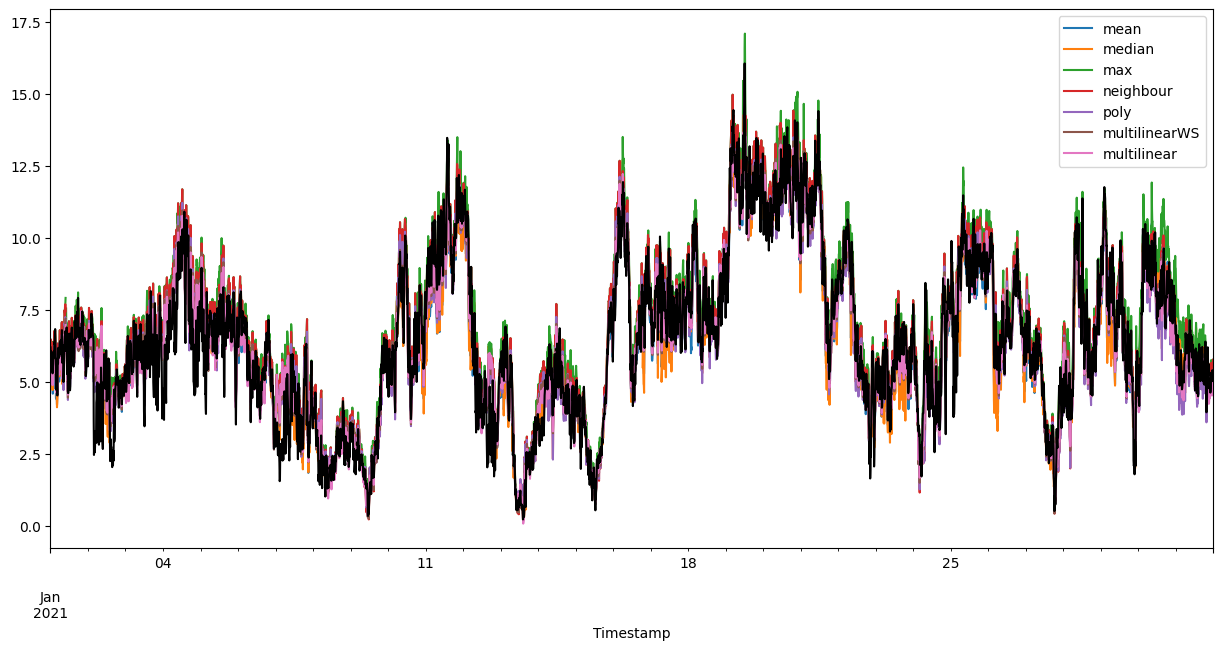

In [13]:
ax = windspeed_predictions.plot(figsize=(15,7))
scada["Wind speed (m/s)"]["Kelmarsh 1"].plot(color="black")

In [14]:
data = windspeed_predictions.copy()
data["measured"] = scada["Wind speed (m/s)"]["Kelmarsh 1"]

source = ColumnDataSource(data=windspeed_predictions)

p = figure(x_axis_type="datetime", width=1200, height=600)

colours = Viridis[len(windspeed_predictions.columns)-1]
colours = Category10[10]
for iter,column_name in enumerate(windspeed_predictions.columns[:-2]):
    p.line(x="Timestamp", y=column_name, source=source, color=colours[iter],legend_label=column_name)

p.line(x="Timestamp", y="measured", source=source, color="black",legend_label="measured")

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='measured' [no close matches] {renderer: GlyphRenderer(id='p1107', ...)}


# Predictions for February

In [15]:
scada = pd.read_excel("February.xlsx",sheet_name="February", header=[0, 1],index_col=[0])

scada_nogaps = scada.copy()

windspeed_predictions = None
result_statistics = None

In [16]:
# Straight average (mean)
method_mean = scada["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]).mean(axis=1)

windspeed_predictions = method_mean
windspeed_predictions.name = "mean"
windspeed_predictions = pd.DataFrame(windspeed_predictions)

In [17]:
# Straight average (median)
method_median = scada["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]).median(axis=1)

windspeed_predictions["median"] = method_median

In [18]:
# Max of other turbines
method_max = scada["Wind speed (m/s)"].drop(columns=["Kelmarsh 1"]).max(axis=1)

windspeed_predictions["max"] = method_max

In [19]:
# Neighbouring turbine's wind speed
 
method_neighbour = scada["Wind speed (m/s)"]["Kelmarsh 2"]

windspeed_predictions["neighbour"] = method_neighbour

In [20]:
# Polynomial fit with neighbouring turbine's wind speed
method_poly = mymodel(scada["Wind speed (m/s)"]["Kelmarsh 2"])
method_poly = pd.Series(method_poly,index=scada.index)

windspeed_predictions["poly"] = method_poly

In [21]:
# Multiple linear regression using wind speed
column_names = [' '.join(words) for words in scada.drop(columns="Kelmarsh 1",level=1).columns]
X = scada.drop(columns="Kelmarsh 1",level=1).dropna()
X.columns=column_names

method_multilinearWS = regr.predict(X)
method_multilinearWS = pd.Series(method_multilinearWS,index=X.index)
method_multilinearWS = method_multilinearWS.reindex(scada.index)

windspeed_predictions["multilinearWS"] = method_multilinearWS

In [22]:
# Multiple linear regression using all variables
X = scada.drop(columns="Kelmarsh 1",level=1).dropna()
X.columns=column_names

method_multilinear = regr.predict(X)
method_multilinear = pd.Series(method_multilinear,index=X.index)
method_multilinear = method_multilinear.reindex(scada.index)

windspeed_predictions["multilinear"] = method_multilinear

In [23]:
windspeed_predictions.to_csv("all_methods_february.csv")

In [24]:
data = windspeed_predictions.copy()
# data["measured"] = scada["Wind speed (m/s)"]["Kelmarsh 1"]

source = ColumnDataSource(data=windspeed_predictions)

p = figure(x_axis_type="datetime", width=1200, height=600)

colours = Viridis[len(windspeed_predictions.columns)]
colours = Category10[10]
for iter,column_name in enumerate(windspeed_predictions.columns):
    p.line(x="Timestamp", y=column_name, source=source, color=colours[iter],legend_label=column_name)

# p.line(x="Timestamp", y="measured", source=source, color="black",legend_label="measured")

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)